In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv("sales_data.csv")

1) What conclusions can you draw about sales performance of various products and regions?
        The most sold product among all offerings is Product 13 at 253 units sold overall and Product 50 (241 units)

        The highest revenues among all are Product 50, 30 and 31 have at $25807, $24111 and $24083

        The least product sold is Product 3 and 26

        The least Revenue generated by a product is 4772 which is product 3. 
        
        The highest number of units sold are in region 9 (972 units) followed by region 10 (905)

        The region with the highest revenue generation are region 9 ($10,0712.90) followed by region 8 ($9,1122.03)

        Lowest performing region by sales and revenue is Region 7 (has low price)

        The average price in the high performing regions are 103 for Region 9, 107 for Region 8 and 94 for Region 10

2) What recommendations do you have for the business?
        The business can consider killing off product 3 as the difference between it and other products's revenue generation is considerable. It is not a profitable product.
        The price of the products should be approximately $100 becuase that seems to be the optimal price with the highest revenue geenrated. 
        Region 7 needs to be developed as it shows low sales and revenue despite the price being considerably low. A new marketing plan or a robust sales network needs to be established assuming their is an adequate target market in the first place.

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?
        The data includes product, region, price, sale units and sales date. The first actio is to remove null values present in the product, region and price and unit sold columns. The units sold and price missing values were filled by taking the median value of the other units and price values. The product and region were dropped becuase that would skew the data towards on product or region if we tried to populate it according to frequency of apprearance.
        The data was visualized with a box plot and scatterplot to identify outliers. It showed 3 most exterem values which stood out from the rest and so they were manually removed. Futher data reduction was not done to preserve a sizable data set which is less homoginized to allow for better insight derivation

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [111]:
df.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


In [112]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [113]:
df['Price'].fillna(df['Price'].median(), inplace=True)


In [114]:
df['Units Sold'].fillna(df['Units Sold'].median(), inplace=True)


In [115]:
df.dropna(inplace=True)

In [116]:
df.drop_duplicates(inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     810 non-null    object 
 1   Region      810 non-null    object 
 2   Price       810 non-null    float64
 3   Units Sold  810 non-null    float64
 4   Sale Date   810 non-null    object 
dtypes: float64(2), object(3)
memory usage: 38.0+ KB


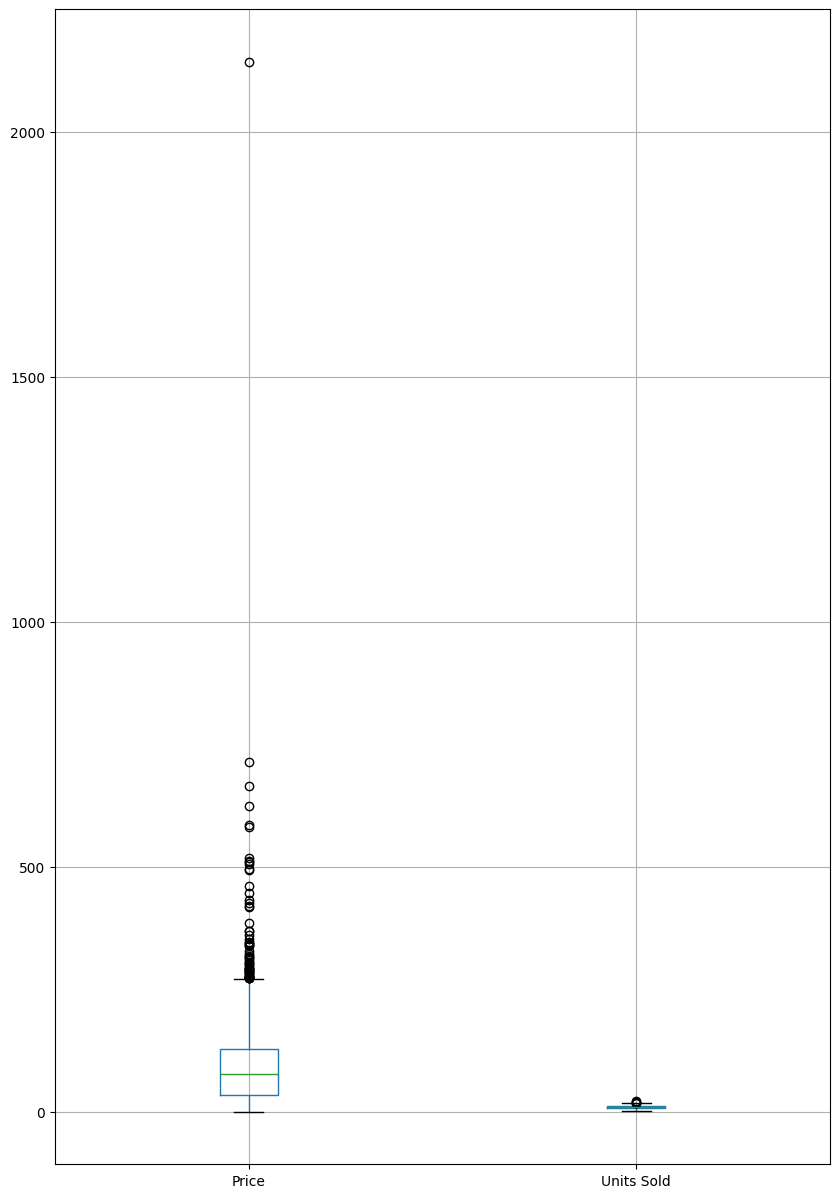

In [118]:
df.boxplot(figsize=(10, 15))
plt.show()

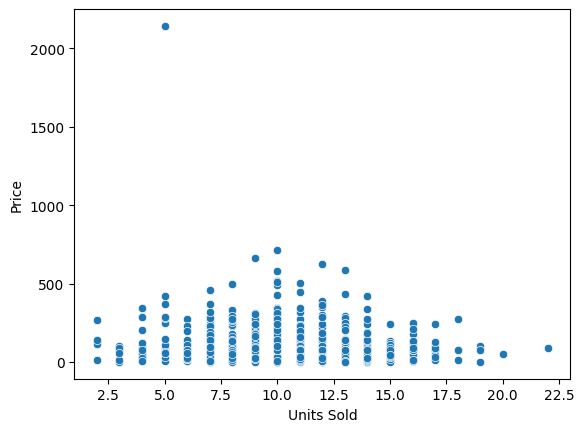

In [119]:
sns.scatterplot(x='Units Sold', y='Price', data=df)
plt.show()

In [120]:
df.sort_values('Price', ascending=False)


,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.30,5.0,2024-08-27
853,Product_41,Region_1,713.29,10.0,2024-05-03
728,Product_31,Region_3,665.00,9.0,2023-12-30
814,Product_26,Region_2,623.60,12.0,2024-03-25
437,Product_26,Region_8,585.17,13.0,2023-03-14
...,...,...,...,...,...
132,Product_39,Region_5,0.37,13.0,2022-05-13
397,Product_10,Region_9,0.33,3.0,2023-02-02
347,Product_9,Region_5,0.31,9.0,2022-12-14
201,Product_24,Region_4,0.22,10.0,2022-07-21


In [121]:
df = df[(df.Price != 2143.30) & (df.Price != 713.29) & (df.Price != 665.00) & (df.Price != 623.60) & (df.Price != 605.87)]

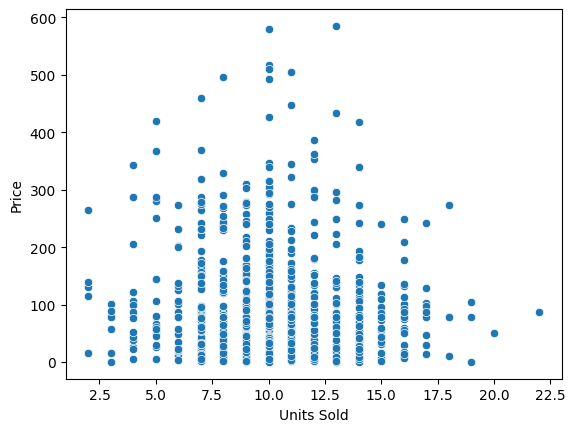

In [122]:
sns.scatterplot(x='Units Sold', y='Price', data=df)
plt.show()

In [123]:
df["Revenue"] = df["Price"] * df["Units Sold"]
df

C:\Users\hp\AppData\Local\Temp\ipykernel_16404\1691293364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Revenue"] = df["Price"] * df["Units Sold"]


,Product,Region,Price,Units Sold,Sale Date,Revenue
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
5,Product_45,Region_1,8.63,11.0,2022-01-06,94.93
6,Product_31,Region_3,23.73,6.0,2022-01-07,142.38
...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,10.0,2024-09-15,2409.70
993,Product_7,Region_9,128.51,17.0,2024-09-20,2184.67
994,Product_1,Region_4,95.24,7.0,2024-09-21,666.68
998,Product_2,Region_10,43.44,15.0,2024-09-25,651.60


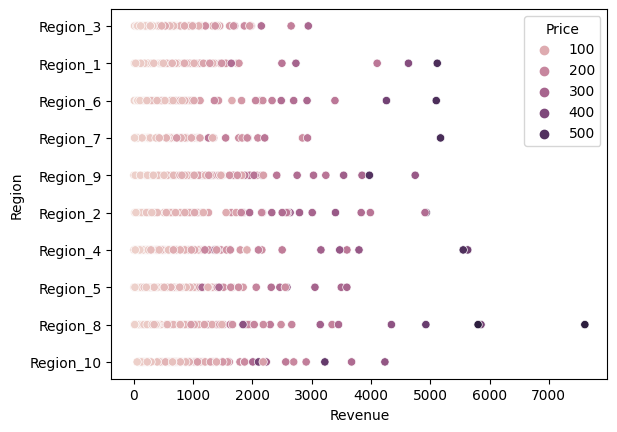

In [124]:
sns.scatterplot(x='Revenue',y="Region", hue = "Price", data=df)
plt.show()

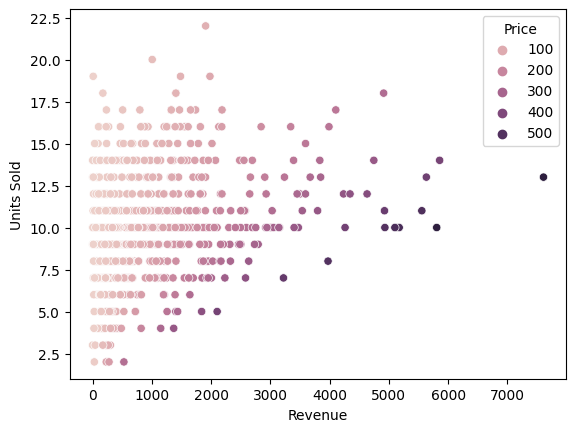

In [125]:
sns.scatterplot(x='Revenue',y="Units Sold", hue="Price", data=df)
plt.show()

Region 4 and 8 have the highest instance of revenue and have the highest price of the product for that instance. Price also seems to have a higher impact on Revenue as compared to units sold
The Units sold also seems to decrease after the price goes past 160

In [126]:
df_prodbyUnits = df.groupby('Product')['Units Sold'].sum()
df_prodbyUnits

Product
Product_1     187.0
Product_10    159.0
Product_11    110.0
Product_12    112.0
Product_13    253.0
Product_14    169.0
Product_15    177.0
Product_16    185.0
Product_17    177.0
Product_18    132.0
Product_19    191.0
Product_2     193.0
Product_20    121.0
Product_21    153.0
Product_22    148.0
Product_23    172.0
Product_24    143.0
Product_25    160.0
Product_26    107.0
Product_27    172.0
Product_28    134.0
Product_29    174.0
Product_3      90.0
Product_30    198.0
Product_31    200.0
Product_32    126.0
Product_33    194.0
Product_34    174.0
Product_35    158.0
Product_36    108.0
Product_37    166.0
Product_38    103.0
Product_39    118.0
Product_4     237.0
Product_40    153.0
Product_41    158.0
Product_42    155.0
Product_43    220.0
Product_44    173.0
Product_45    157.0
Product_46    187.0
Product_47    125.0
Product_48    198.0
Product_49    114.0
Product_5     260.0
Product_50    241.0
Product_6     148.0
Product_7     146.0
Product_8     141.0
Product_9   

In [127]:
df_prodbyrev = df.groupby('Product')['Revenue'].sum()
df_prodbyrev

Product
Product_1     13699.91
Product_10    10965.34
Product_11     8099.85
Product_12    10132.25
Product_13    18877.73
Product_14    22940.88
Product_15    15848.98
Product_16    21615.81
Product_17    15269.52
Product_18     8924.53
Product_19    19971.35
Product_2     23443.52
Product_20    16839.15
Product_21    13678.54
Product_22    15905.21
Product_23    18964.67
Product_24    14841.33
Product_25    17429.03
Product_26    16186.34
Product_27    13330.00
Product_28    13198.10
Product_29    20987.02
Product_3      4772.20
Product_30    24111.14
Product_31    24083.49
Product_32     8893.86
Product_33    16693.79
Product_34    20806.67
Product_35    16886.37
Product_36     9785.31
Product_37    15095.75
Product_38     7727.92
Product_39    13761.47
Product_4     19489.91
Product_40    21800.90
Product_41    16943.13
Product_42    12254.86
Product_43    14262.48
Product_44    15248.29
Product_45    17312.64
Product_46    16671.55
Product_47    12655.90
Product_48    23063.30
Pro

In [128]:
df_prodbyprice = df.groupby('Product')['Price'].mean()
df_prodbyprice

Product
Product_1      76.658947
Product_10     63.507857
Product_11     73.550000
Product_12     86.504545
Product_13     87.230000
Product_14    128.336667
Product_15     91.174375
Product_16    102.748333
Product_17     95.818889
Product_18     64.576923
Product_19    121.786842
Product_2     125.641111
Product_20    127.272500
Product_21     95.285714
Product_22    107.148667
Product_23    110.870000
Product_24    112.439286
Product_25    110.250000
Product_26    142.497273
Product_27     78.374375
Product_28     94.292308
Product_29    122.687778
Product_3      55.431250
Product_30    120.916316
Product_31    119.125500
Product_32     67.398571
Product_33     86.002381
Product_34    124.029412
Product_35    108.932500
Product_36     82.728333
Product_37     90.370588
Product_38     73.716364
Product_39    113.652143
Product_4      83.751818
Product_40    145.816471
Product_41    116.814667
Product_42     82.247500
Product_43     66.860952
Product_44     92.478333
Product_45    119

In [129]:
prod_insight = pd.DataFrame(df_prodbyprice,columns=['Price'])
prod_insight["units sold"] = df_prodbyUnits
prod_insight["revenue"] = df_prodbyrev

prod_insight. sort_values("revenue", ascending=False)

,Price,units sold,revenue
Product,,,
Product_50,108.484286,241.0,25807.66
Product_30,120.916316,198.0,24111.14
Product_31,119.125500,200.0,24083.49
Product_2,125.641111,193.0,23443.52
Product_48,112.101667,198.0,23063.30
Product_14,128.336667,169.0,22940.88
Product_40,145.816471,153.0,21800.90
Product_16,102.748333,185.0,21615.81
Product_29,122.687778,174.0,20987.02


The most sold product among all offerings is Product 13 at 253 units sold overall and Product 50 (241 units)

The highest revenues among all are Product 50 and 30 have at $25807 and $24111

The least product sold is Product 3 and 26

The least Revenue generated by a product is 4772 which is product 3. So product 3 can be considered for dicontinuation.

In [130]:
df_regbyrev = df.groupby('Region')['Revenue'].sum()
df_regbyrev

Region
Region_1      64687.92
Region_10     84297.31
Region_2      82902.37
Region_3      64024.94
Region_4      91917.22
Region_5      77902.81
Region_6      67088.35
Region_7      54560.28
Region_8     104535.24
Region_9     104685.78
Name: Revenue, dtype: float64

In [131]:
df_regbyunit = df.groupby('Region')['Units Sold'].sum()
df_regbyunit

Region
Region_1     735.0
Region_10    905.0
Region_2     712.0
Region_3     798.0
Region_4     905.0
Region_5     850.0
Region_6     770.0
Region_7     637.0
Region_8     848.0
Region_9     980.0
Name: Units Sold, dtype: float64

In [132]:
df_regbyprice = df.groupby('Region')['Price'].mean()
df_regbyprice

Region
Region_1      88.705278
Region_10     94.727333
Region_2     118.879857
Region_3      85.930897
Region_4     102.285543
Region_5      96.176548
Region_6      87.039605
Region_7      88.811406
Region_8     118.776190
Region_9     107.576771
Name: Price, dtype: float64

In [133]:
region_insight = pd.DataFrame(df_regbyprice,columns=['Price'])
region_insight["units sold"] = df_regbyunit
region_insight["revenue"] = df_regbyrev

region_insight. sort_values("revenue", ascending=False)

,Price,units sold,revenue
Region,,,
Region_9,107.576771,980.0,104685.78
Region_8,118.776190,848.0,104535.24
Region_4,102.285543,905.0,91917.22
Region_10,94.727333,905.0,84297.31
Region_2,118.879857,712.0,82902.37
Region_5,96.176548,850.0,77902.81
Region_6,87.039605,770.0,67088.35
Region_1,88.705278,735.0,64687.92
Region_3,85.930897,798.0,64024.94


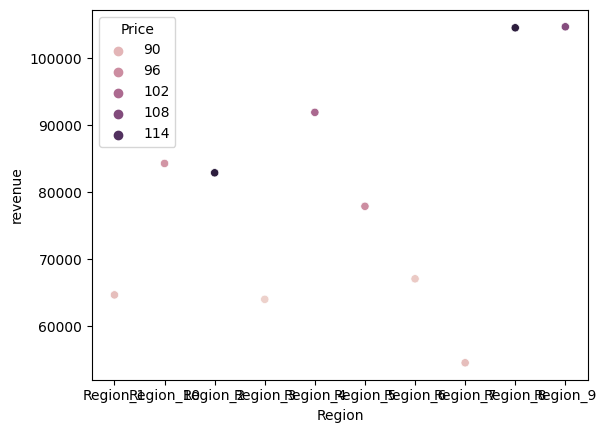

In [134]:
sns.scatterplot(data=region_insight, x="Region", y="revenue", hue="Price")
plt.show()

The highest number of units sold are in region 9 (972 units) followed by region 10 (905)

The region with the highest revenue generation are region 9 ($10,0712.90) followed by region 8 ($9,1122.03)

Lowest performing region by sales and revenue is Region 7 (has low price)

The average price in the high performing regions are 103 for Region 9, 107 for Region 8 and 94 for Region 10